## multilayer perceptron，MLP
   1. Relu函数

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("..") 

def xyplot(x_vals, y_vals, name):
    plt.figure(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')


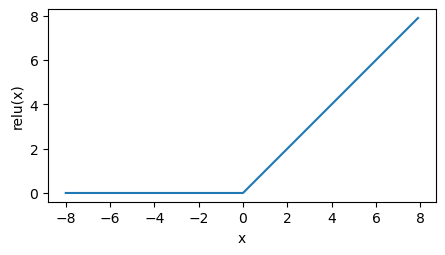

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')


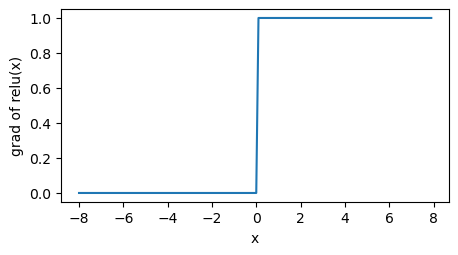

In [3]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

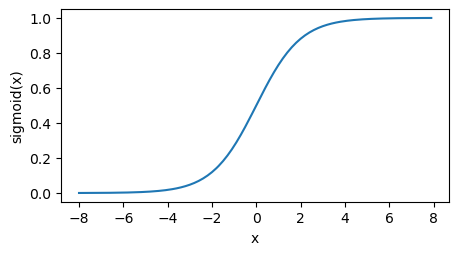

In [4]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')


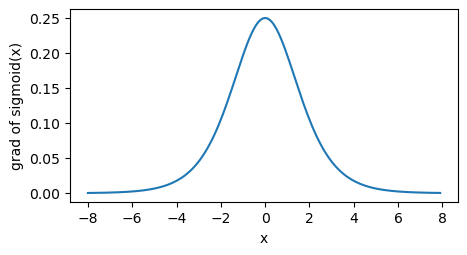

In [5]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

In [ ]:
## MLP实现

In [7]:
import d2lzh_pytorch as d2l

def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

def net(X):
    X = X.view((-1, NUM_INPUTS))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

loss = torch.nn.CrossEntropyLoss()

EPOCHS = 5
LR = 100.0
BATCH_SIZE = 256
NUM_INPUTS, NUM_OUTPUTS, NUM_HIDDENS = 784, 10, 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=BATCH_SIZE)
W1 = torch.tensor(np.random.normal(0, 0.01, (NUM_INPUTS, NUM_HIDDENS)), dtype=torch.float)
b1 = torch.zeros(NUM_HIDDENS, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (NUM_HIDDENS, NUM_OUTPUTS)), dtype=torch.float)
b2 = torch.zeros(NUM_OUTPUTS, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

d2l.train_ch3(net, train_iter, test_iter, loss, EPOCHS, BATCH_SIZE, params, LR)



Using downloaded and verified file: C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw

Using downloaded and verified file: C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw

Using downloaded and verified file: C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5116653.32it/s]


Extracting C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\lihua/Datasets/FashionMNIST\FashionMNIST\raw

epoch 1, loss 0.0030, train acc 0.714, test acc 0.770
epoch 2, loss 0.0019, train acc 0.822, test acc 0.812
epoch 3, loss 0.0017, train acc 0.844, test acc 0.839
epoch 4, loss 0.0015, train acc 0.854, test acc 0.853
epoch 5, loss 0.0014, train acc 0.866, test acc 0.829
